In [1]:
#Import all
import pandas as pd
from string import punctuation
import re
import numpy as np

In [2]:
#df = pd.read_csv('D:\D5k.csv', encoding='utf-8')
df=pd.read_csv("/home/ubuntu/Desktop/ML/Coding/dataset/SentNoB Dataset/Train.csv",encoding='utf-8')


In [3]:
print(df.head())

                                                Data  Label
0  মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোম...      1
1  এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায়...      2
2                          ভাই আপনার কথাই যাদু রয়েছে      1
3                        উওরটা আমার অনেক ভাল লেগেছে       1
4  আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ?...      0


In [4]:
print(df.tail())

                                                    Data  Label
12570  বর্ডারে অনেক লেট হয়ে যাওয়াতে আমরা জিপে করে চলে...      1
12571  আমার সোনার বাংলাতে এমন রক্ষক নামের ভক্ষকের কোন...      2
12572  ওনারা এত হাইজিনিক ও এত সুন্দর পরিবেশে রান্না ক...      1
12573  বাংলাদেশ আমরা পুলিশ চাই না এই ধরনে পুলিশ দরকার...      2
12574         বসুন্ধরা শাখার হাজি বিরিয়ানি একবারেই ফালতু      2


In [5]:
print(df.describe())

              Label
count  12575.000000
mean       1.131531
std        0.757994
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000


In [6]:
df.shape

(12575, 2)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [8]:
df.isnull().sum()

Data     0
Label    0
dtype: int64

Text(0.5, 1.0, 'Visualization of Missing Values')

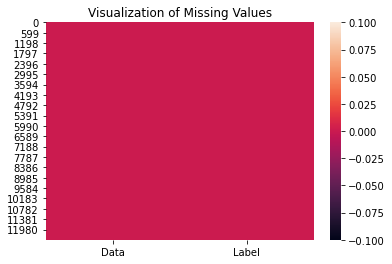

In [9]:
sns.heatmap(df.isnull())
plt.title('Visualization of Missing Values')

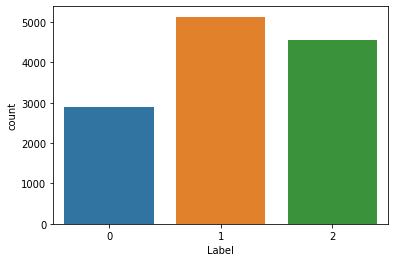

In [10]:

ax = sns.countplot(x="Label", data=df)


In [11]:
target=df['Label']

In [12]:
plain_text=df['Data'].tolist()

In [13]:
print(plain_text)

['মুগ্ধ হয়ে গেলাম মামু. আর তোমায় কি কমু. বলো তোমায় কোথায় পামু. আমি তোমার সাথে যাবু. গান কমু তোমার মতো গলি ঘুরমু.', 'এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায় এই তিনটা পুলিশ কে তরে সবার সামনে মেরে পেলা দরকার ', 'ভাই আপনার কথাই যাদু রয়েছে', 'উওরটা আমার অনেক ভাল লেগেছে ', 'আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না ? প্রাইভেট কার নিয়ে ?', 'যেমন : পরীক্ষার রেজাল্টের সময় , বিভিন্ন ব্যানিজ্যিক প্রচার ইত্যাদি ', 'বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআনের পাখিদের কোন খবর নাই আরিফ অব্যয় বোদার বয় সিঙ্গেল বয় জাতি হিসেবে বাঙালি বর্তমানে কত মুরুক্ষ এটা তারই প্রমাণ ঝাড়ু মার তোর কপালে', 'সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই , চোখ খুলে দিছো ', 'আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে ? গালিবয়', 'তুমি রেপারই হও , ডাক্তার হওয়ার দরকার নাই তোমার ', 'লেসবো মেয়েটার ফ্রেন্ড টা অনেক কিউট ', 'আচ্ছা চারপাশে অন্ধকার কেন ? লাইট টা শুধু আপনাদের টেবিলে পড়ছে কেন', 'আল্লাহ আপনাকে হায়াত দারাজ করুন এবং সবার মাঝে সুস্থ ভাবে বেঁচে থাকার তৌফিক দান করুক', 'ভাই এতো সুন্দর ভিডিও বানান কিন্তু সাবস্ক

In [14]:
# punctuation,digit,English characture,white-space remove

def remove_pun_digit_engChar(plain_text):
    
    processed_plain_text=[]

    for i in range(len(plain_text)):
        p=[plain_text[i]
        .replace(","," ").replace(";","").replace("।"," ").replace("?","").replace("!","").replace(":","").replace("—"," ")
        .replace(":-","").replace("-"," ").replace("’","").replace("'","").replace("“","").replace("”","").replace("(","")
        .replace(")","").replace("{","").replace("}","").replace("[","").replace("]","").replace("√","").replace("<","")
        .replace(">","").replace("=","").replace("...","").replace(".","").replace("*","").replace("|","").replace("/","")
        .replace("$","").replace("@","").replace("+","").replace("0","").replace("1","").replace("2","").replace("3","")
        .replace("4","").replace("5","").replace("6","").replace("7","").replace("8","").replace("9","").replace("A","")
        .replace("B","").replace("C","").replace("D","").replace("E","").replace("F","").replace("G","").replace("H","")
        .replace("I","").replace("J","").replace("K","").replace("L","").replace("M","").replace("N","").replace("O","")
        .replace("P","").replace("Q","").replace("R","").replace("S","").replace("T","").replace("U","").replace("V","")
        .replace("W","").replace("X","").replace("Y","").replace("Z","").replace("০","").replace("১","").replace("২","")
        .replace("৩","").replace("৪","").replace("৫","").replace("৬","").replace("৭","").replace("৮","").replace("৯","")
        .replace("a","").replace("b","").replace("c","").replace("d","").replace("e","").replace("f","").replace("g","")
        .replace("h","").replace("i","").replace("j","").replace("k","").replace("l","").replace("m","").replace("n","")
        .replace("o","").replace("p","").replace("q","").replace("r","").replace("s","").replace("t","").replace("u","")
        .replace("v","").replace("w","").replace("x","").replace("y","").replace("z","").replace(" "," ")]
        processed_plain_text.append(p)
    print(processed_plain_text)
    return processed_plain_text

In [15]:
#Bengali_Stopwords
li=['অতএব','অথচ','অথবা','অনুযায়ী','অনেক', 'ও', 'অনেকে', 'অনেকেই', 'অন্তত','অন্য', 'অবধি', 'অবশ্য','অর্থাত','আই','আগামী','আগে','আগেই','আছে','আজ','আদ্যভাগে','আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার','আমি','আর','আরও','ই','ইত্যাদি', 'ইহা', 
    'উচিত','উত্তর','উনি','উপর','উপরে','এ','এঁদের','এঁরা','এই','একই','একটি','একবার','একে','এক্','এখন','এখনও','এখানে','এখানেই','এটা','এটাই','এটি','এত','এতটাই','এতে','এদের','এব','এবং','এবার','এমন','এমনকী','এমনি','এর','এরা','এল','এস','এসে','ঐ','ও','ওঁদের','ওঁর',
    'ওঁরা','ওই','ওকে','ওখানে','ওদের','ওর','ওরা','কখনও','কত','কবে','কমনে','কয়েক','কয়েকটি','করছে','করছেন','করতে','করবে','করবেন',
    'করলে','করলেন','করা','করাই','করায়','করার','করি','করিতে','করিয়া','করিয়ে','করে','করেই','করেছিলেন','করেছে','করেছেন','করেন','কাউকে',
    'কাছ','কাছে','কাজ','কাজে','কারও','কারণ','কি','কিংবা','কিছু','কিছুই','কিন্তু','কী','কে','কেউ','কেউই','কেখা','কেন','কোটি','কোন','কোনও','কোনো','ক্ষেত্রে','কয়েক','খুব','গিয়ে','গিয়েছে','গিয়ে','গুলি','গেছে','গেল','গেলে',
    'গোটা','চলে','চান', 'চায়','চার','চালু','চেয়ে','চেষ্টা','ছাড়া','ছাড়াও','ছিল','ছিলেন','জন','জনকে','জনের','জন্য','জন্যওজে','জানতে','জানা',
    'জানানো','জানায়','জানিয়ে','জানিয়েছে','জে','জ্নজন','টি','ঠিক','তখন','তত','তথা','তবু','তবে','তা','তাঁকে','তাঁদের','তাঁর','তাঁরা','তাঁাহারা',
    'তাই','তাও','তাকে','তাতে','তাদের','তার','তারপর','তারা','তারৈ','তাহলে','তাহা','তাহাতে','তাহার','তিনঐ','তিনি','তিনিও','তুমি','তুলে','তেমন',
    'তো','তোমার','থাকবে','থাকবেন','থাকা','থাকায়','থাকে','থাকেন','থেকে','থেকেই','থেকেও','দিকে','দিন','দিতে','দিয়ে','দিয়েছে','দিয়েছেন','দিলেন',
    'দু','দুই','দুটি','দুটো','দেওয়া','দেওয়ার','দেওয়া','দেখতে','দেখা','দেখে','দেন','দেয়','দ্বারা','ধরা','ধরে','ধামার','নতুন','নয়','না','নাই',
    'নাকি','নাগাদ','নানা','নিজে','নিজেই','নিজেদের','নিজের','নিতে','নিয়ে','নেই','নেওয়া','নেওয়ার','নয়','পক্ষে','পর','পরে','পরেই','পরেও',
    'পর্যন্ত','পাওয়া','পাচ','পারি','পারে','পারেন','পি','পেয়ে','প্রতি','প্রথম','প্রভৃতি','প্রাথমিক','প্রায়','ফলে','ফিরে','ফের','বক্তব্য','বদলে','বন',
    'বরং','বলতে','বলল','বললেন','বলা','বলে','বলেছেন','বলেন','বসে','বহু','বা','বাদে','বার','বি','বিনা','বিভিন্ন','বিশেষ','বিষয়টি','বেশ',
    'বেশি','ব্যবহার','ব্যাপারে','ভাবে','ভাবেই','মতো','মতোই','মধ্যভাগে','মধ্যে','মধ্যেই','মধ্যেও','মনে','মাত্র','মাধ্যমে','মোট','মোটেই','যখন',
    'যত','যতটা','যথেষ্ট','যদি','যদিও','যা','যাঁর','যাঁরা','যাওয়া','যাওয়ার','যাওয়া','যাকে','যাচ্ছে','যাতে','যাদের','যান','যাবে','যায়','যার',
    'যারা','যিনি','যে','যেখানে','যেতে','যেন','যেমন','র','রকম','রয়েছে','রাখা','রেখে','লক্ষ','শুধু','শুরু','সঙ্গে','সঙ্গেও','সব','সবার',
    'সমস্ত','সম্প্রতি','সহ','সহিত','সাধারণ','সামনে','সি','সুতরাং','সে','সেই','সেখান','সেখানে','সেটা','সেটাই','সেটাও','সেটি','স্পষ্ট','স্বয়ং',
    'হইতে','হইবে','হইয়া','হওয়া','হওয়ায়','হওয়ার','হচ্ছে','হত','হতে','হতেই','হন','হবে','হবেন','হয়','হয়তো','হয়নি','হয়ে','হয়েই','হয়েছিল',
    'হয়েছে','হয়েছেন','হল','হলে','হলেই','হলেও','হলো','হাজার','হিসাবে','হৈলে','হোক','হয়','টা','তে','য়','ক','খ','গ','ঘ','ঙ','চ','ছ','জ','ঝ','ঞ','ট','ঠ','ড','ঢ','ণ','ত','থ','দ','ধ','ন','প',
     'ফ','ব','ভ','ম','য','র','ল','শ','স','হ','অ','আ','ঈ','ঋ','এ','ঔ','এক','বেন','অব','থ্রোন্স']

In [16]:
# tokenization and reomove stop words also remove white space

def tokenization_remove_stop_words_and_white_space(processed_plain_text):
    #whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
    tokenization_result=[]
    for j in processed_plain_text:
        t=j[0].split(" ")
        #t=whitespace.sub(" ", t).strip()
    #     tokenization_result.append(t)
        stop_word_removed_text=[]
        for w in t:
            if w not in li:
                # Remove stop words
                if len(w)>1:
                    stop_word_removed_text.append(w)
                
        if len(stop_word_removed_text)>1:
               tokenization_result.append(stop_word_removed_text)

    print(tokenization_result)
    return tokenization_result

In [17]:
plain_text = remove_pun_digit_engChar(plain_text)

[['মুগ্ধ হয়ে গেলাম মামু আর তোমায় কি কমু বলো তোমায় কোথায় পামু আমি তোমার সাথে যাবু গান কমু তোমার মতো গলি ঘুরমু'], ['এই কুত্তার বাচ্চাদের জন্য দেশটা আজ এমন অবস্তায় এই তিনটা পুলিশ কে তরে সবার সামনে মেরে পেলা দরকার '], ['ভাই আপনার কথাই যাদু রয়েছে'], ['উওরটা আমার অনেক ভাল লেগেছে '], ['আমার নিজের গাড়ী নিয়ে কি সাজেক যেতে পারবো না  প্রাইভেট কার নিয়ে '], ['যেমন  পরীক্ষার রেজাল্টের সময়   বিভিন্ন ব্যানিজ্যিক প্রচার ইত্যাদি '], ['বিশ্বনন্দিত বিশ্ব জয় করা ইসলামের পাখিদের কোরআনের পাখিদের কোন খবর নাই আরিফ অব্যয় বোদার বয় সিঙ্গেল বয় জাতি হিসেবে বাঙালি বর্তমানে কত মুরুক্ষ এটা তারই প্রমাণ ঝাড়ু মার তোর কপালে'], ['সাপ্তাহিক মুসুল্লিদের কথাটাও তুলে ধরলে ভাই   চোখ খুলে দিছো '], ['আমি ভেবেছিলাম গালিগালাজ করে সেরা ছেলে সে  গালিবয়'], ['তুমি রেপারই হও   ডাক্তার হওয়ার দরকার নাই তোমার '], ['লেসবো মেয়েটার ফ্রেন্ড টা অনেক কিউট '], ['আচ্ছা চারপাশে অন্ধকার কেন  লাইট টা শুধু আপনাদের টেবিলে পড়ছে কেন'], ['আল্লাহ আপনাকে হায়াত দারাজ করুন এবং সবার মাঝে সুস্থ ভাবে বেঁচে থাকার তৌফিক দান করুক'], ['ভাই এতো সুন্দর ভিডিও বা

In [18]:
plain_text = tokenization_remove_stop_words_and_white_space(plain_text)

[['মুগ্ধ', 'হয়ে', 'গেলাম', 'মামু', 'তোমায়', 'কমু', 'বলো', 'তোমায়', 'কোথায়', 'পামু', 'সাথে', 'যাবু', 'গান', 'কমু', 'গলি', 'ঘুরমু'], ['কুত্তার', 'বাচ্চাদের', 'দেশটা', 'অবস্তায়', 'তিনটা', 'পুলিশ', 'তরে', 'মেরে', 'পেলা', 'দরকার'], ['ভাই', 'কথাই', 'যাদু', 'রয়েছে'], ['উওরটা', 'ভাল', 'লেগেছে'], ['গাড়ী', 'নিয়ে', 'সাজেক', 'পারবো', 'প্রাইভেট', 'কার', 'নিয়ে'], ['পরীক্ষার', 'রেজাল্টের', 'সময়', 'ব্যানিজ্যিক', 'প্রচার'], ['বিশ্বনন্দিত', 'বিশ্ব', 'জয়', 'ইসলামের', 'পাখিদের', 'কোরআনের', 'পাখিদের', 'খবর', 'আরিফ', 'অব্যয়', 'বোদার', 'বয়', 'সিঙ্গেল', 'বয়', 'জাতি', 'হিসেবে', 'বাঙালি', 'বর্তমানে', 'মুরুক্ষ', 'তারই', 'প্রমাণ', 'ঝাড়ু', 'মার', 'তোর', 'কপালে'], ['সাপ্তাহিক', 'মুসুল্লিদের', 'কথাটাও', 'ধরলে', 'ভাই', 'চোখ', 'খুলে', 'দিছো'], ['ভেবেছিলাম', 'গালিগালাজ', 'সেরা', 'ছেলে', 'গালিবয়'], ['রেপারই', 'হও', 'ডাক্তার', 'হওয়ার', 'দরকার'], ['লেসবো', 'মেয়েটার', 'ফ্রেন্ড', 'কিউট'], ['আচ্ছা', 'চারপাশে', 'অন্ধকার', 'লাইট', 'আপনাদের', 'টেবিলে', 'পড়ছে'], ['আল্লাহ', 'আপনাকে', 'হায়াত', 'দারাজ', 'করুন', 'মাঝে', 'সুস্

In [19]:
# Remove stop words

# r =[]
# stop_words_removal_result = [[] for i in range(len(tokenization_result))]
# for i in range(len(tokenization_result)):
#     for j in range(len(tokenization_result[i])):
#         if tokenization_result[i][j] not in li:
#             r.append(tokenization_result[i][j])
#             stop_words_removal_result[i].append(tokenization_result[i][j])
# print(stop_words_removal_result)

In [20]:
from collections import Counter
cnt = Counter(r)
TF = {}
for processed_plain_text in stop_words_removal_result:
    for word in processed_plain_text:
        TF[word] = round(cnt[word]/len(processed_plain_text),2)
#print(counts)
print(TF)

NameError: name 'r' is not defined

In [ ]:
n = len(stop_words_removal_result) 
#print(n)
terms = list(TF.keys())
import math
IDF = {}
for term in terms:
    c = 0
    for doc in stop_words_removal_result:
        if term in doc:
            c+=1
    IDF[term] = math.log(n/(c+1))
print(IDF)


In [ ]:
#Calculate tfIdf
tfIdf = [[] for i in range(len(stop_words_removal_result))]
for i in range(len(stop_words_removal_result)):
    for word in terms:
        if word in stop_words_removal_result[i]:
            tfIdf[i].append(TF[word]*IDF[word])
        else:
            tfIdf[i].append(0)
print(tfIdf[10])

In [ ]:
#Train Data

train_x= tfIdf[:10000]
train_y= target[:10000]

#Test Data
test_x=tfIdf[10000:]
test_y=target[10000:]

In [ ]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
DT=tree.DecisionTreeClassifier()
DT.fit(train_x, train_y)

In [ ]:
predictions_train = DT.predict(train_x)

train_DT=accuracy_score(train_y, predictions_train)
print('\nTraining Accuracy using DT:',train_DT)
print('\n\t')
print('Classification Report On Training Data:\n')
print(classification_report(train_y,predictions_train)) 

In [ ]:
predictions_test = DT.predict(test_x)

test_DT=accuracy_score(test_y, predictions_test)
print('\nTest Accuracy using DT:',test_DT)
 
print('\nConfusion matrix:\n',confusion_matrix(test_y,predictions_test))
print('\n\tClassification Report On Testing Data:\n')
print(classification_report(test_y,predictions_test)) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=0) 
RF.fit(train_x, train_y)

In [ ]:
pred_train = RF.predict(train_x)
train_RF=accuracy_score(train_y, pred_train)
print('\nTraining Accuracy using RF:',train_RF)
print('\n\tClassification Report on Training Data:\n\n')
print(classification_report(train_y,pred_train)) 



In [ ]:
pred_test = RF.predict(test_x)
test_RF=accuracy_score(test_y, pred_test)
print('\nTest Accuracy using RF:',test_RF)
 


print('\nConfusion matrix:\n\n',confusion_matrix(test_y,pred_test))
print('\n\tClassification Report on Testing Data:\n')
print(classification_report(test_y,pred_test))  


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
NB=GaussianNB()
NB.fit(train_x, train_y)

In [ ]:
pred_train = NB.predict(train_x)
train_NB=accuracy_score(train_y, pred_train)
print('\nTraining Accuracy using NB:',train_NB)
print('\n\tClassification Report on Training Data:\n\n')
print(classification_report(train_y,pred_train)) 

In [ ]:
pred_test = NB.predict(test_x)
test_NB=accuracy_score(test_y, pred_test)
print('\nTest Accuracy using NB:',test_NB)
 


print('\nConfusion matrix:\n\n',confusion_matrix(test_y,pred_test))
print('\n\tClassification Report on Testing Data:\n')
print(classification_report(test_y,pred_test))  


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

GBM = GradientBoostingClassifier(n_estimators=3500, max_features=2, max_depth=9, random_state=0)
GBM.fit(train_x,train_y)

In [ ]:
pred_train = GBM.predict(train_x)
train_GBM=accuracy_score(train_y, pred_train)
print('\nTraining Accuracy using NB:',train_GBM)
print('\n\tClassification Report on Training Data:\n\n')
print(classification_report(train_y,pred_train)) 

In [ ]:
pred_test = GBM.predict(test_x)
test_GBM=accuracy_score(test_y, pred_test)
print('\nTest Accuracy using GBM:',test_GBM)
print('\nConfusion matrix:\n\n',confusion_matrix(test_y,pred_test))
print('\n\tClassification Report on Testing Data:\n')
print(classification_report(test_y,pred_test)) 